In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

Linear Regression Equation - Y = mx +c

In [3]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [6]:
X = df['Chirps/Second']
Y = df['Ground Temperature']
x=df.iloc[:,:-1].values#feature 2d array
y=df.iloc[:,1]#target 1darray
print(x.shape)
print(y.shape)

(15, 1)
(15,)


In [8]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()
model.fit(x,y)
print("Intercept:",model.intercept_,"Coefficient:",model.coef_)

Intercept: 22.848982308066887 Coefficient: [3.410323]


The Linear Regression Equation is
y_pred=(3.410323*x_test)+22.848982308066887  

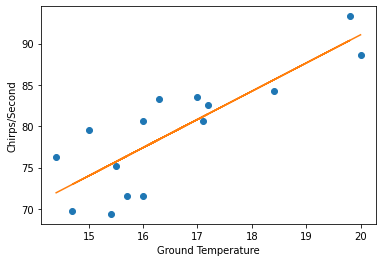

In [10]:
#2)chart original data and equation
#y_pred = model.predict(x)
plt.plot(x,y,'o')
plt.plot(x,model.predict(x))
plt.xlabel("Ground Temperature")
plt.ylabel("Chirps/Second")
plt.show()

In [13]:
#3)Equation's  R2  score -goodness of fit measure

from sklearn.metrics import r2_score
score=model.score(x,y)
#r2 = r2_score(y,model.predict(x))
print("Model Score:",score)

Model Score: 0.6922946529147003


Since R2 Score is less than 0.8 correlation is not strong

In [18]:
#Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
#x=(y-c)/m
xpd=(95 -model.intercept_)/model.coef_
print("Approximate rate of chirping at 95 Temperature is",xpd)

Approximate rate of chirping at 95 Temperature is [21.15665223]


In [24]:
#Interpolate Data - With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.
# What was the approximate ground temperature that morning?
from scipy.interpolate import interp1d
y_interp=interp1d(X,y)
y_interp(18)
print("Approximate Temperature if chirping is 18 is",model.predict([[18]]))


Approximate Temperature if chirping is 18 is [84.2347963]


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [25]:
df = pd.read_fwf("brain_body.txt")
#fixedwidthforamtted

In [26]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [35]:
Xb=df['Brain']
Yb=df['Body']
xb=df[['Brain']].values
yb=df['Body']
print(xb.shape,yb.shape)

(62, 1) (62,)


In [39]:
bwmodel=LinearRegression()
bwmodel.fit(xb,yb)
print("Coefficient:",bwmodel.coef_,"Intercept:",bwmodel.intercept_)
print('The Linear Regression Equation is : y=',bwmodel.coef_,'x+',bwmodel.intercept_)

Coefficient: [0.96649637] Intercept: 91.00439620740687
The Linear Regression Equation is : y= [0.96649637] x+ 91.00439620740687


Text(0, 0.5, 'Body')

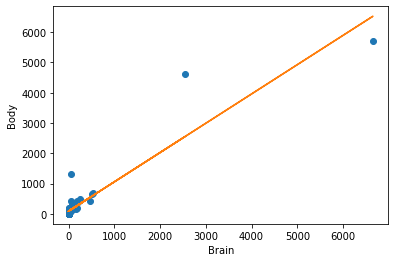

In [41]:
#chart original data and equation 
plt.plot(xb,yb,'o')
plt.plot(xb,bwmodel.predict(xb))
plt.xlabel("Brain")
plt.ylabel("Body")

In [42]:
#find r2score 
print("Model Score:",bwmodel.score(xb,yb))

Model Score: 0.8726620843043331


R2 score is greater than 0.8 so it shows good correlation but the plot shows the presence of outliers .Score should be calculated after removal of outliers.

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [52]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [53]:
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [55]:
#linear regression equation

xsd=df[['Sex',"Rank", "Year", "Degree", "YSdeg"]].values
ysd=df['Salary']
print(xsd.shape,ysd.shape)

(52, 5) (52,)


In [57]:
sdmodel=LinearRegression()
sdmodel.fit(xsd,ysd)
print("Linear Regression Equation is y=(x1+x2+x3+x4+x5)",sdmodel.coef_,'+',sdmodel.intercept_)

Linear Regression Equation is y=(x1+x2+x3+x4+x5) [ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] + 11410.14654725559


In [58]:
#Find coloumn with high r2 score 
X1=df[['Sex']]
X2=df[['Rank']]
X3=df[['Year']]
X4=df[['Degree']]
X5=df[['YSdeg']]
Y=df['Salary']

In [60]:

model1=sdmodel.fit(X1,Y)
print('Score1: ',sdmodel.score(X1,Y))
model2=sdmodel.fit(X2,Y)
print('Score2: ',sdmodel.score(X2,Y))
model3=sdmodel.fit(X3,Y)
print('Score3: ',sdmodel.score(X3,Y))
model4=model.fit(X4,Y)
print('Score4: ',sdmodel.score(X4,Y))
model5=sdmodel.fit(X5,Y)
print('Score5: ',sdmodel.score(X5,Y))

Score1:  0.06389892583288004
Score2:  0.7525360539274633
Score3:  0.49093702676921624
Score4:  -0.7813777310202037
Score5:  0.45542813458360276


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Degree
Feature names seen at fit time, yet now missing:
- Year

  warnings.warn(message, FutureWarning)


Report whether sex is a factor

In [61]:
#Score 1 is less than 0.8 hence there is no correlation ,and can be determined it is not a factor